In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy
import pickle
import joblib
import numpy as np

In [3]:
df = pd.read_csv("../data/Flight_Price_Prediction.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
# Dropping first column
df.drop(columns=df.columns[0], inplace=True)

In [5]:
df = df[df['price'] < 98972]

In [6]:
oh_encoded_features = pd.get_dummies(df[['source_city', 'destination_city']])
oh_encoded_features

label_encoder = LabelEncoder()
df['departure_time'] = label_encoder.fit_transform(df['departure_time'])
df['arrival_time'] = label_encoder.fit_transform(df['arrival_time'])
df['stops'] = label_encoder.fit_transform(df['stops'])
df['class'] = label_encoder.fit_transform(df['class'])
df['airline'] = label_encoder.fit_transform(df['airline'])

df_encoded = pd.concat([df, oh_encoded_features], axis=1)
df_encoded = df_encoded.drop(columns=['flight'], axis=1)

C:\Users\musab\AppData\Local\Temp\ipykernel_55172\2127892678.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_time'] = label_encoder.fit_transform(df['departure_time'])
C:\Users\musab\AppData\Local\Temp\ipykernel_55172\2127892678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_time'] = label_encoder.fit_transform(df['arrival_time'])
C:\Users\musab\AppData\Local\Temp\ipykernel_55172\2127892678.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [7]:
df_encoded = df_encoded.drop(columns=['source_city', 'destination_city', 'source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'destination_city_Bangalore',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'], axis=1)

In [8]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']/1000

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240023, 7), (60006, 7), (240023,), (60006,))

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(7,)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(x_train, y_train, epochs=10)

C:\Users\musab\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 101.3691 - mae: 5.8699
Epoch 2/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 31.3821 - mae: 3.3756
Epoch 3/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 29.9279 - mae: 3.2680
Epoch 4/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 28.9748 - mae: 3.2059
Epoch 5/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 28.6303 - mae: 3.1803
Epoch 6/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 27.8289 - mae: 3.1409
Epoch 7/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 27.7828 - mae: 3.1380
Epoch 8/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 27.3445 - mae: 3.1098
Epoch 9/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 27.2498 - mae: 3.0959
Epoch 10/10
7501/7501 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 27.4109 - mae: 3.0919


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,181 (133.52 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,788 (89.02 KB)

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 26.7642 - mae: 3.0455


(26.712024688720703, 3.0450022220611572)

In [12]:
y_test

173754     5.960
86793      3.521
221960    63.816
271699    49.207
227309    53.152
           ...  
17176      4.496
156763     5.656
293818    44.144
291937    69.713
65280      4.358
Name: price, Length: 60006, dtype: float64

In [13]:
y_predict = model.predict(x_test)
y_predict

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[ 6.343209 ],
       [ 6.694163 ],
       [68.09703  ],
       ...,
       [57.21406  ],
       [58.052242 ],
       [ 5.6161838]], dtype=float32)

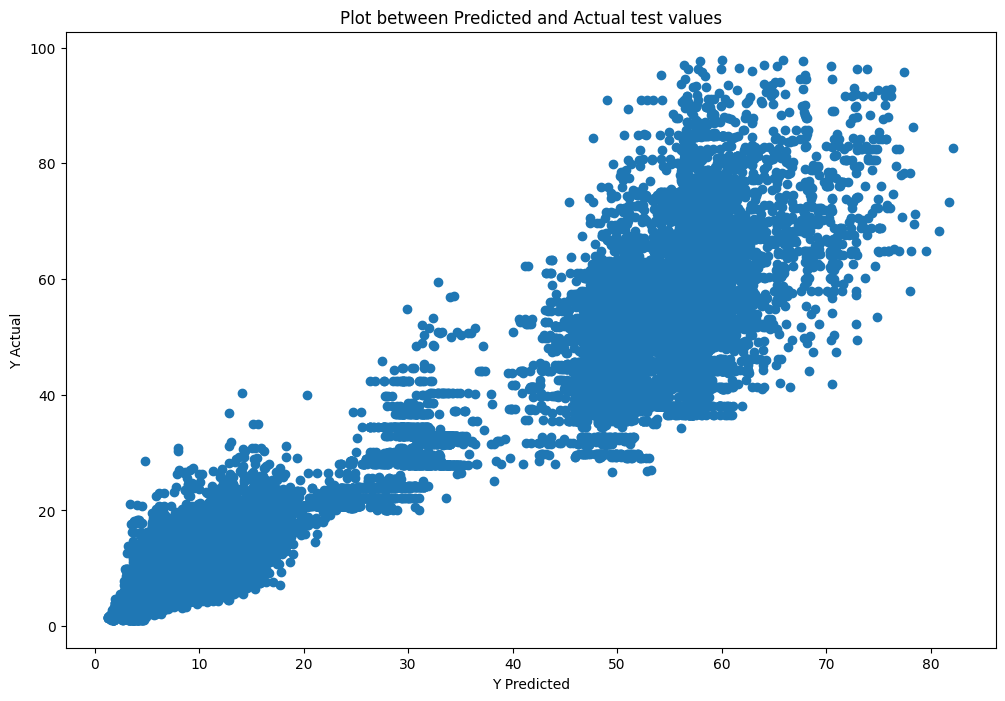

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(y_predict, y_test)
plt.xlabel("Y Predicted")
plt.ylabel("Y Actual")
plt.title("Plot between Predicted and Actual test values")
plt.savefig("plot.jpg")
plt.show()

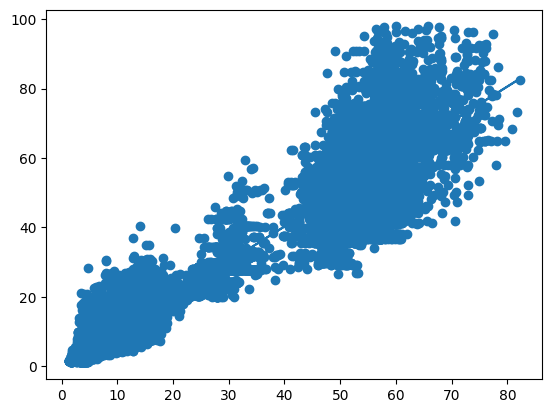

In [15]:
x = y_predict[:, 0]
y = y_test

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


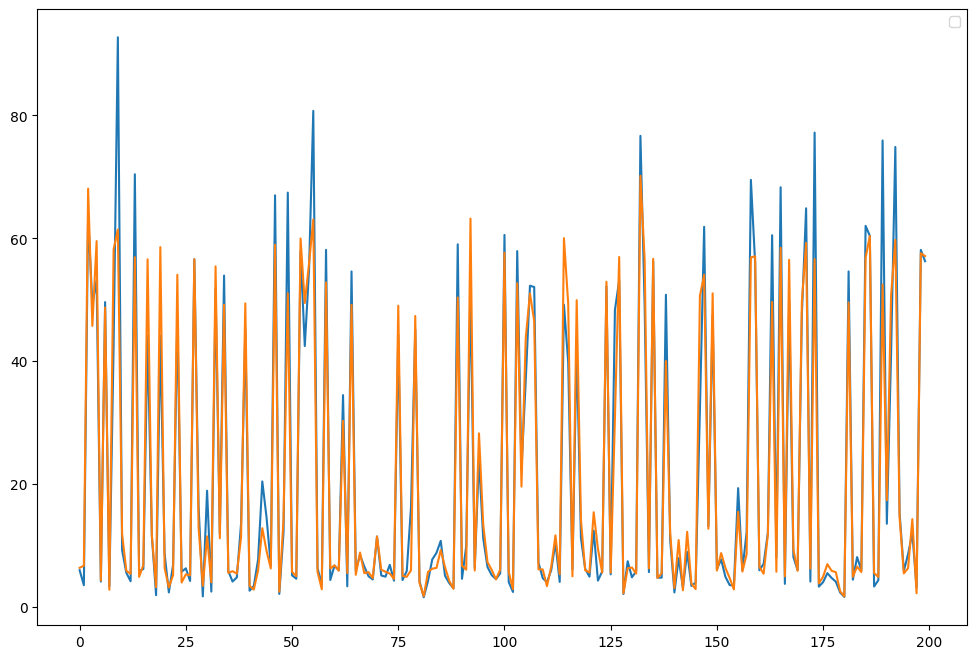

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(y_test[:200])), y_test[:200])
plt.plot(np.arange(len(y_predict[:200])), y_predict[:200])
plt.legend()
plt.show()

In [17]:
mse = mean_squared_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)
mae = mean_absolute_error(y_test, y_predict)
r_squared = r2_score(y_test, y_predict)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)

Mean Squared Error: 26.701158802451776
Root Mean Squared Error: 5.167316402394165
Mean Absolute Error: 3.045002660463585
R-squared: 0.9479201273076162


C:\Users\musab\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
#Save model
model.save("../output/model-nn.keras")

In [3]:
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'tensorflow'

In [25]:
model = load_model("../output/model-nn.keras")

C:\Users\musab\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,788 (89.02 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,395 (44.52 KB)